In [380]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

diabetes_df = pd.read_csv("C:\\Users\\supat\\PycharmProjects\\HW_6\\hw_6_df\\1df_diabetes.csv")
diabetes_df.shape

(768, 9)

In [381]:
diabetes_df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


<AxesSubplot: xlabel='Outcome', ylabel='count'>

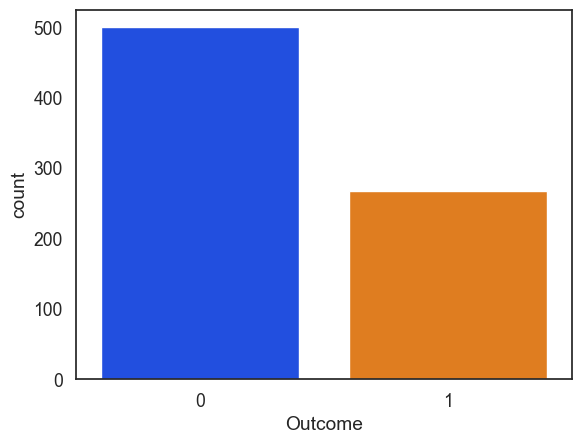

In [382]:
sns.countplot(x = 'Outcome',data = diabetes_df)

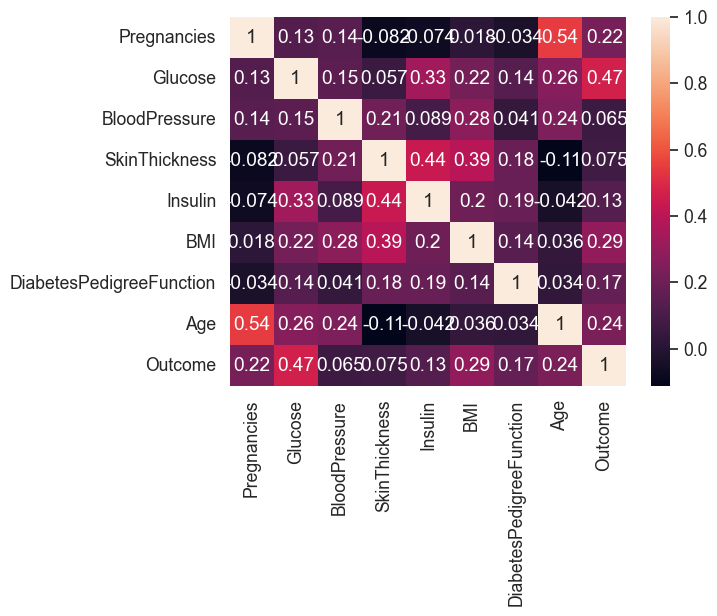

In [383]:
sns.heatmap(diabetes_df.corr(), annot = True)
plt.show()

In [384]:
# Counting null values.
# There is no null values.
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [385]:
# Replacing zero values with NaN
dataset_new = diabetes_df.copy() # create backup
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    dataset_new[col].replace(0,np.NaN,inplace=True)

In [386]:
# Count NaN again
dataset_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [387]:
"""
Let's calculate the proportion of zero values in each feature.
Pregnancies 0 number of cases 111, percent is 14.45 %
Glucose 0 number of cases 5, percent is 0.65 %
BloodPressure 0 number of cases 35, percent is 4.56 %
SkinThickness 0 number of cases 227, percent is 29.56 %
Insulin 0 number of cases 374, percent is 48.70 %
BMI 0 number of cases 11, percent is 1.43 %
"""
dataset_new.isnull().sum() / len(dataset_new) * 100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [388]:
"""
 Replacing NaN with mean values.
 Change the corresponding values to the mean value of each feature.
 """
for col in cols:
    dataset_new[col].fillna(dataset_new[col].mean(), inplace = True)


In [389]:
# check again
dataset_new.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [390]:
def create_plot_for_columns(df: pd.DataFrame):
    """
    The function takes a dataframe and creates plots
    for each of the dataframe columns.
    
    :param df: pd.DataFrame
    """
    plt.figure(figsize=(20,20))
    ax = 1
    
    for i in df.columns:
        plt.subplot(3, 3, ax)
        sns.histplot(df[i])
        plt.title(i, fontsize=20)
        ax += 1
    
    plt.show()

In [391]:
def check_corr(df: pd.DataFrame):
    """
    The function takes a data frame as input,
    and then checks the correlation between its objects.
    """
    corr = df.corr().round(2)
    sns.set(font_scale=1.15)
    plt.figure(figsize=(14, 10))
    sns.set_palette("bright")
    sns.set_style("white")
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, annot=True, cmap='gist_yarg_r', mask=mask, cbar=True)
    plt.title('Correlation Plot')

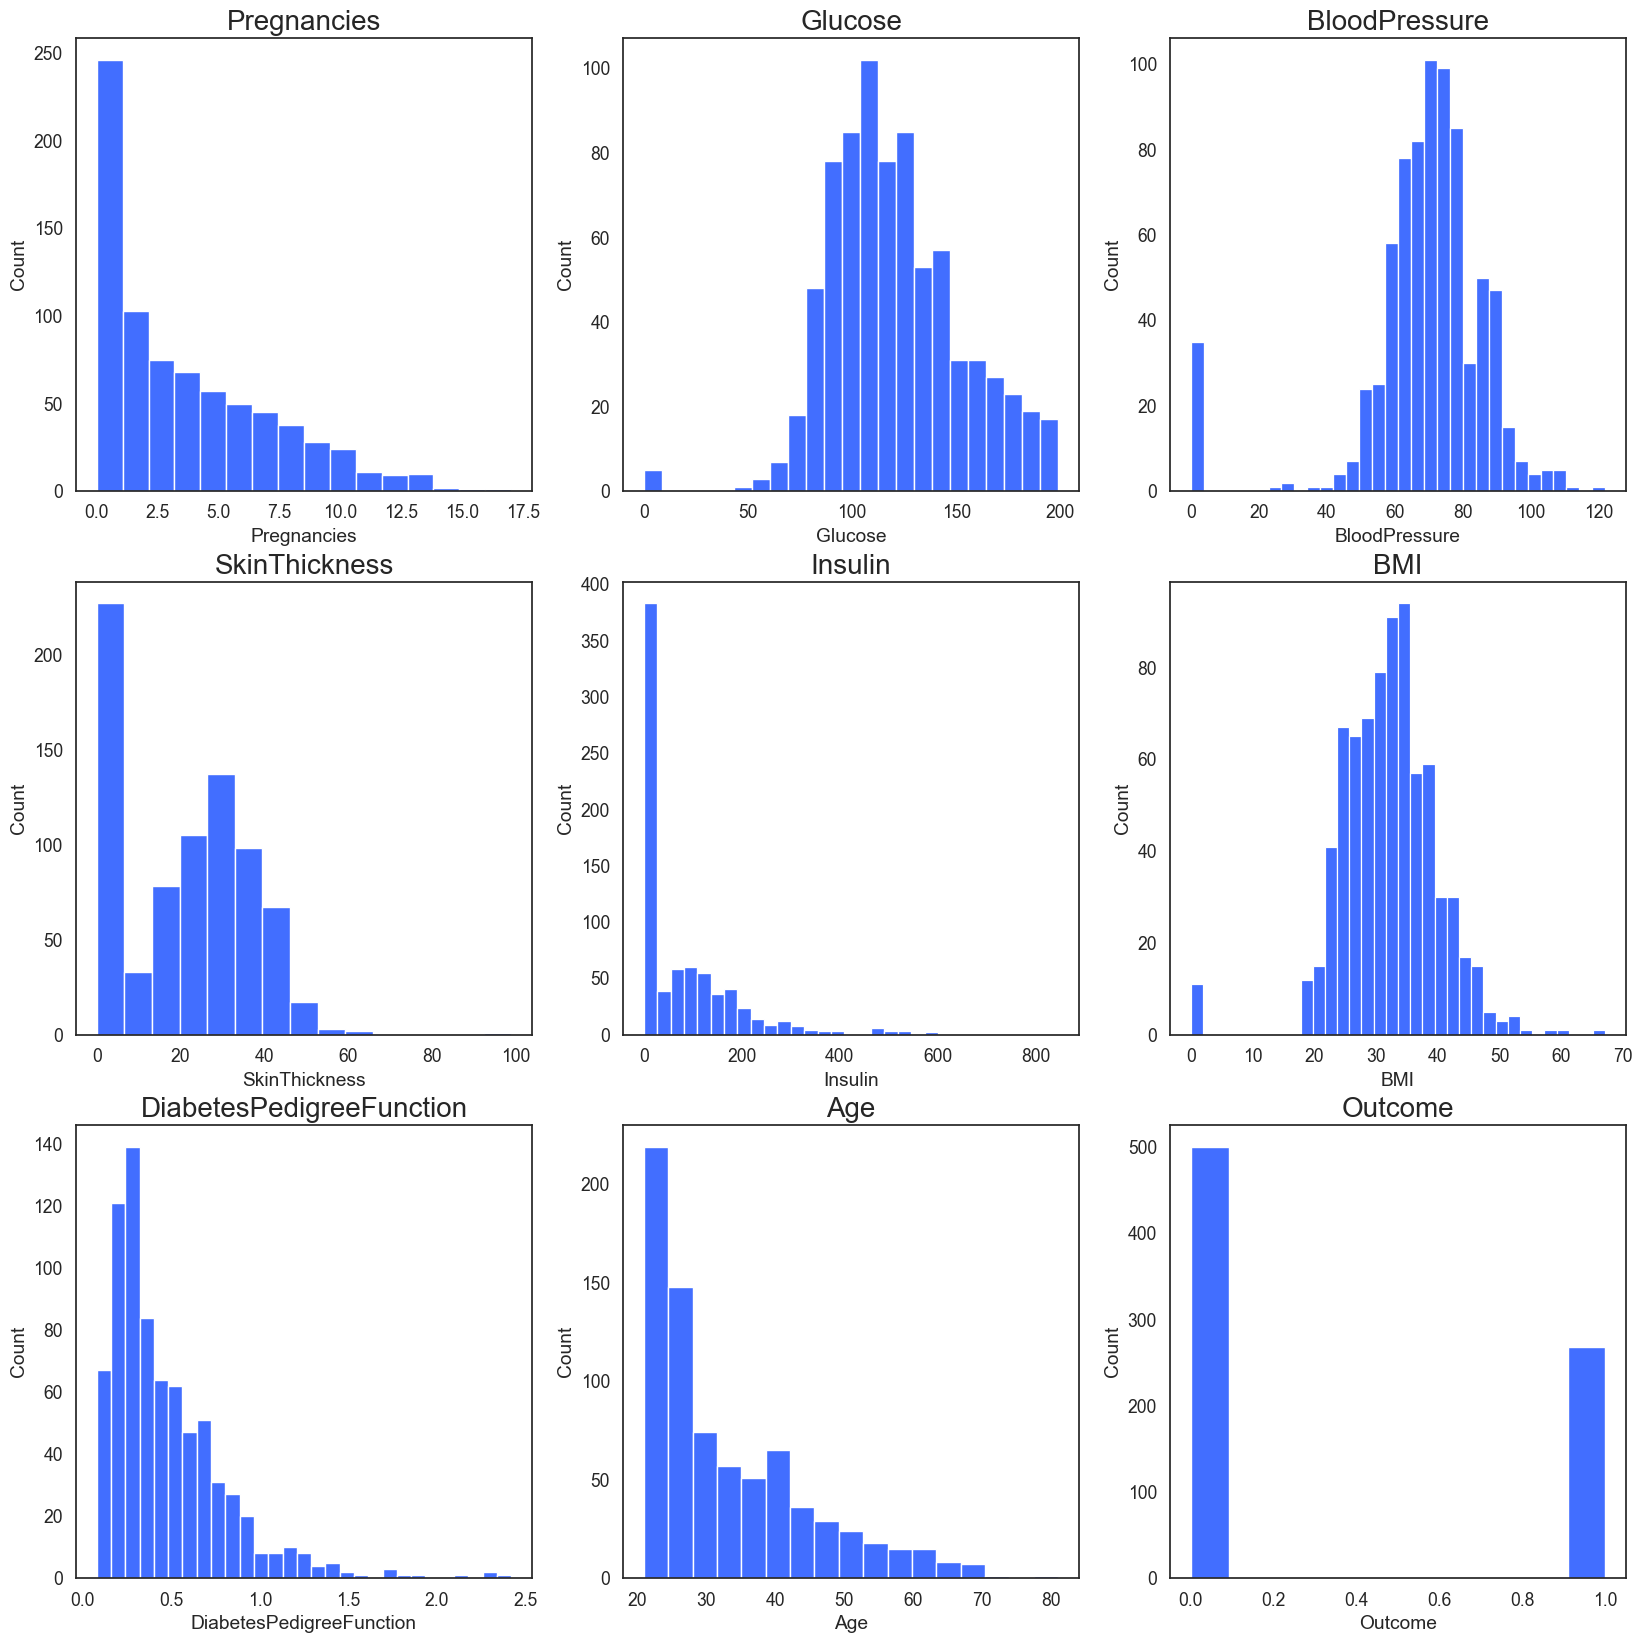

In [392]:
# Exploratory data analysis
create_plot_for_columns(diabetes_df)

<AxesSubplot: >

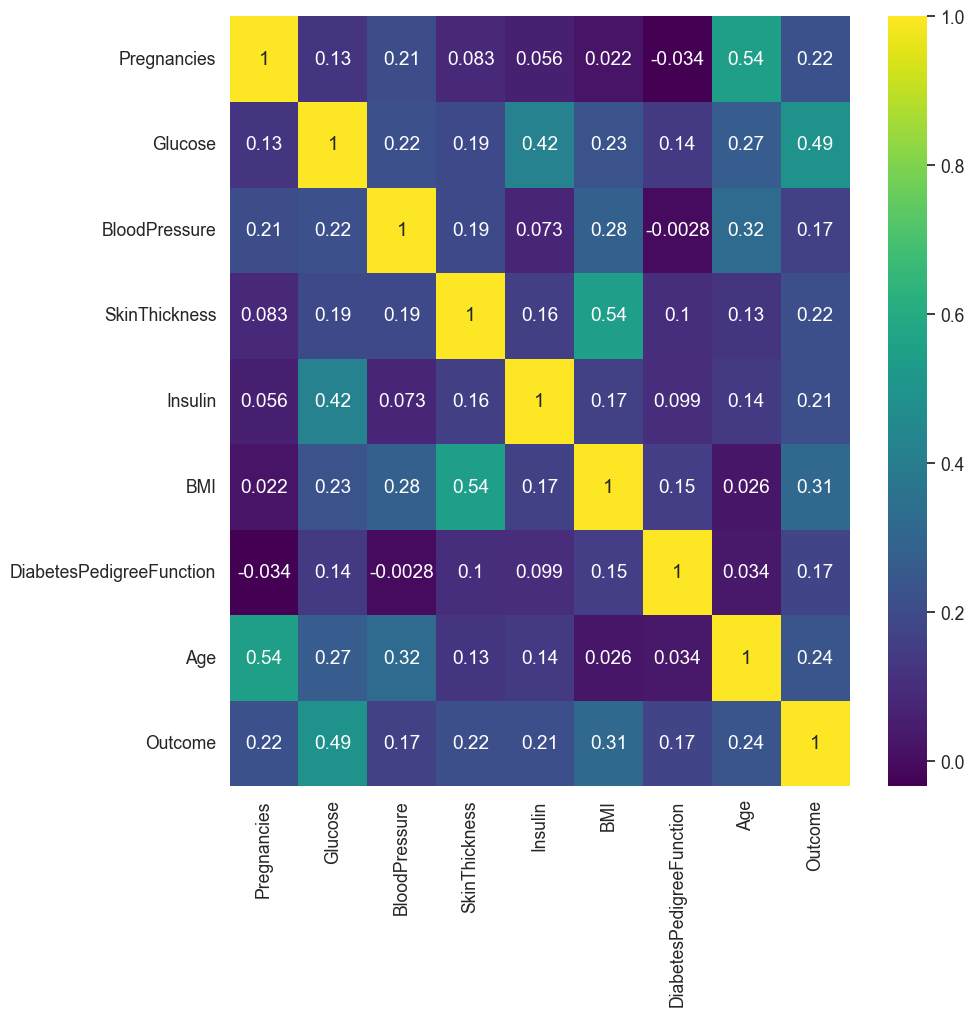

In [393]:
# Glucose has higher correlation to insulin
# BMI has higher correlation to Skinthickness
# BloodPressure has correlation to Age
plt.figure(figsize=(10,10))
sns.heatmap(dataset_new.corr(),annot=True, cmap = 'viridis')

<AxesSubplot: xlabel='Outcome', ylabel='Glucose'>

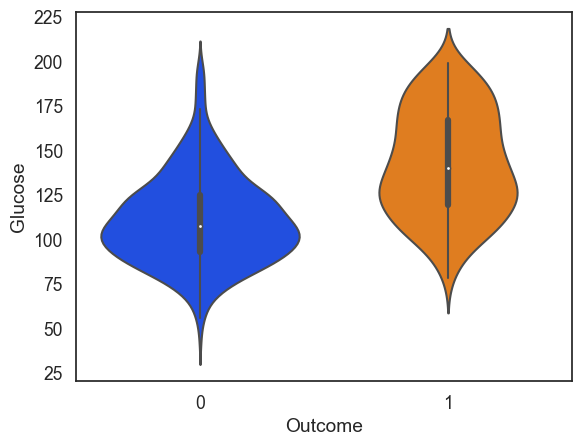

In [394]:
sns.violinplot(data=dataset_new, x="Outcome", y="Glucose", split=True)

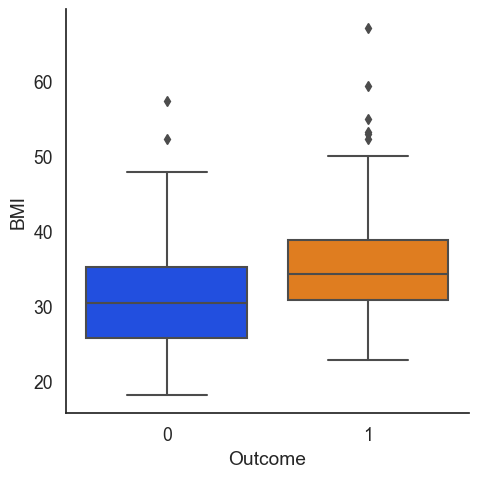

In [395]:
sns.catplot(data=dataset_new, x="Outcome", y="BMI", kind="box")

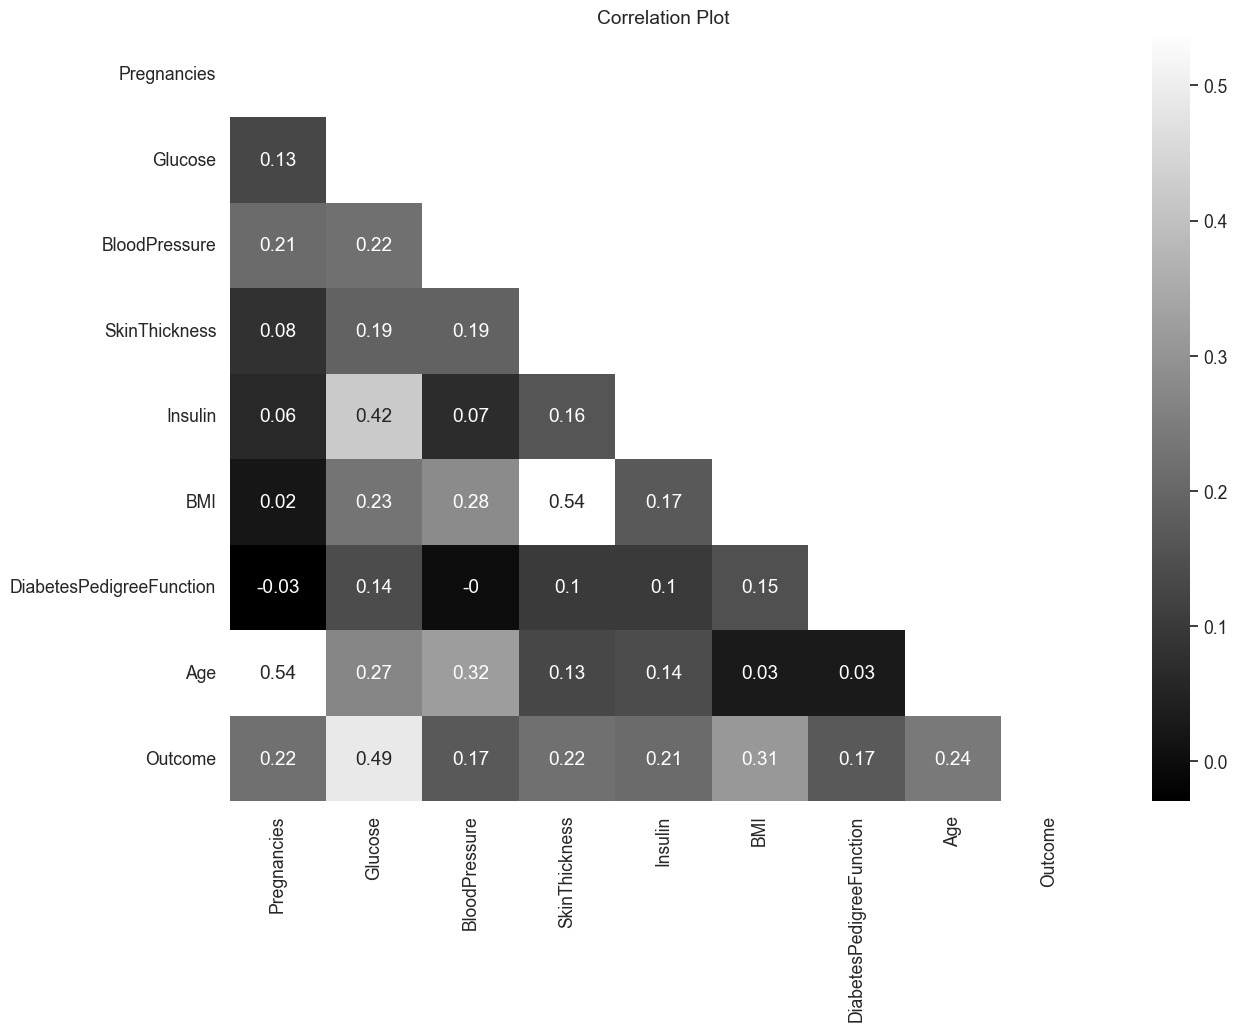

In [396]:
check_corr(dataset_new)

Observation:

1. The correlation between Outcome and Glucose is high. Glucose seems to be the most important feature.
2. High correlation coefficient with SkinThickness and BMI. There may be a multicollinearity problem.
3. Diabetic patients have a higher BMI (body mass index).

In [397]:
cardiovascular_df = pd.read_csv('2df_test.csv')
cardiovascular_df2 = pd.read_csv('2df_train.csv')

In [398]:
# Rename columns
cardiovascular_df.rename(columns = {'glucose':'Glucose', 'diaBP':'BloodPressure',
                              'age':'Age', 'diabetes': 'Outcome'}, inplace = True)
cardiovascular_df2.rename(columns = {'glucose':'Glucose', 'diaBP':'BloodPressure',
                              'age':'Age', 'diabetes': 'Outcome'}, inplace = True)

In [399]:
"""
Сreate a new dataframe, where data is collected from two CSV-files,
'cardiovascular_df' and 'cardiovascular_df2'.

In the first CSV file, the data is collected only by female gender,
so we need to filter out the current CSV files by 'sex' == 'F'.
"""
filtered_df2 = pd.concat([cardiovascular_df[cardiovascular_df['sex'] == 'F'],
                    cardiovascular_df2[cardiovascular_df2['sex'] == 'F']], ignore_index= True)

In [400]:
result_csv = dataset_new.drop(['Pregnancies', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction'], axis=1)
filtered_df2 = pd.concat([filtered_df2.pop(x) for x in ['Glucose', 'BloodPressure', 'BMI', 'Age', 'Outcome']], axis=1)

In [401]:
result_csv = result_csv.merge(filtered_df2, how='outer')

"""
 Replacing NaN with mean values.
 Change the corresponding values to the mean value of each feature.
 """
result_csv['Glucose'].fillna(dataset_new['Glucose'].mean(), inplace = True)
result_csv['BMI'].fillna(dataset_new['BMI'].mean(), inplace = True)

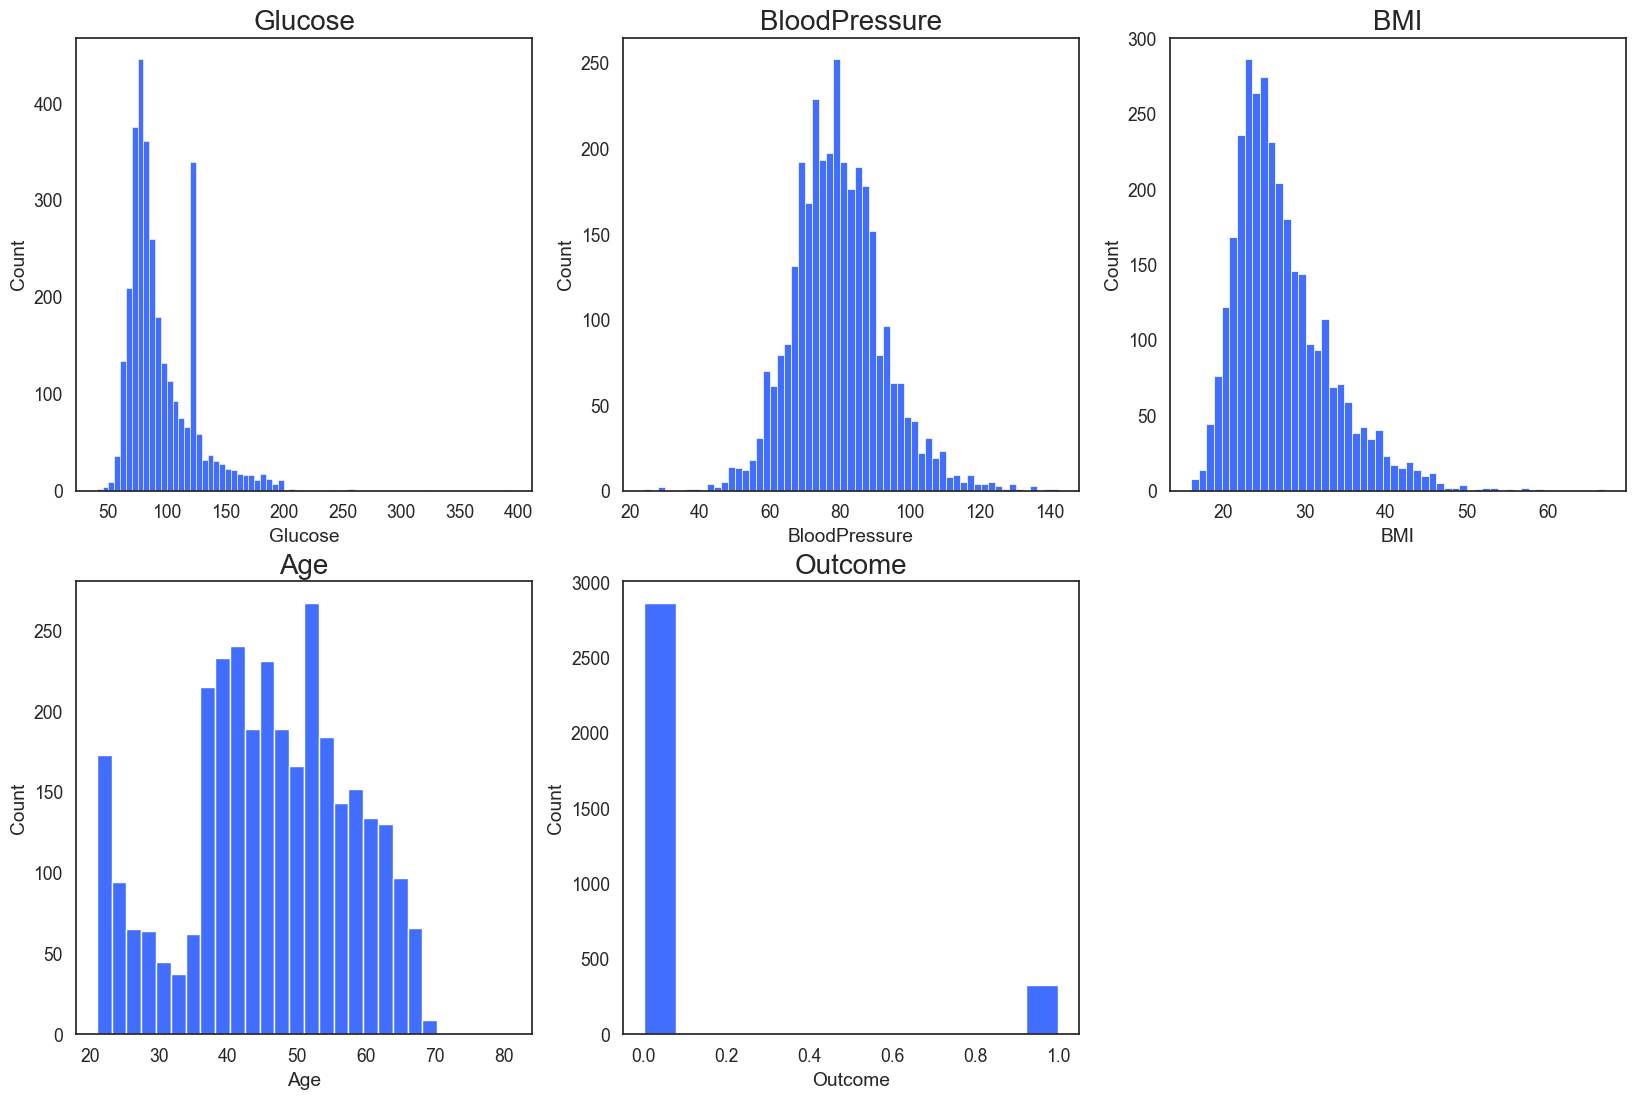

In [402]:
create_plot_for_columns(result_csv)

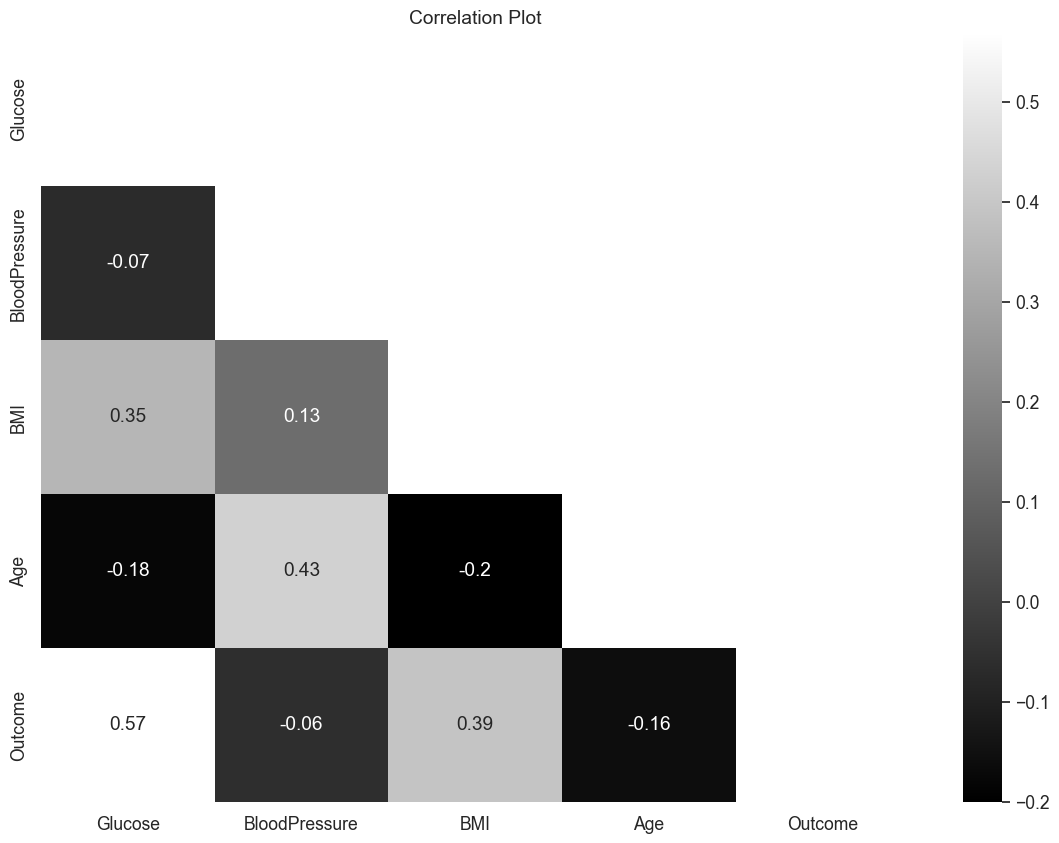

In [403]:
check_corr(result_csv)

<AxesSubplot: xlabel='Outcome', ylabel='Glucose'>

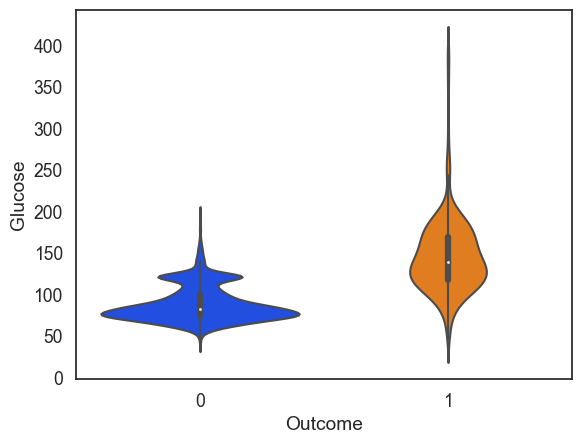

In [404]:
sns.violinplot(data=result_csv, x="Outcome", y="Glucose", split=True)

In [405]:
result_csv

,Glucose,BloodPressure,BMI,Age,Outcome
0,148.0,72.0,33.60,50,1
1,85.0,66.0,26.60,31,0
2,183.0,64.0,23.30,32,1
3,89.0,66.0,28.10,21,0
4,137.0,40.0,43.10,33,1
...,...,...,...,...,...
3182,77.0,85.0,26.59,57,0
3183,113.0,86.0,26.98,61,0
3184,103.0,79.0,29.28,60,0
3185,84.0,56.0,21.96,46,0


In [406]:
df3 = pd.read_csv('diabetes_012_health_indicators_df3.csv')
df4 = pd.read_csv('diabetes_binary_5050split_health_indicators_df3.csv')
df5 = pd.read_csv('diabetes_binary_health_indicators_df3.csv')
diabetes_detailed = pd.concat([df3, df4, df5], ignore_index= True)
print(df3.shape[0] + df4.shape[0] + df5.shape[0] == diabetes_detailed.shape[0])

True


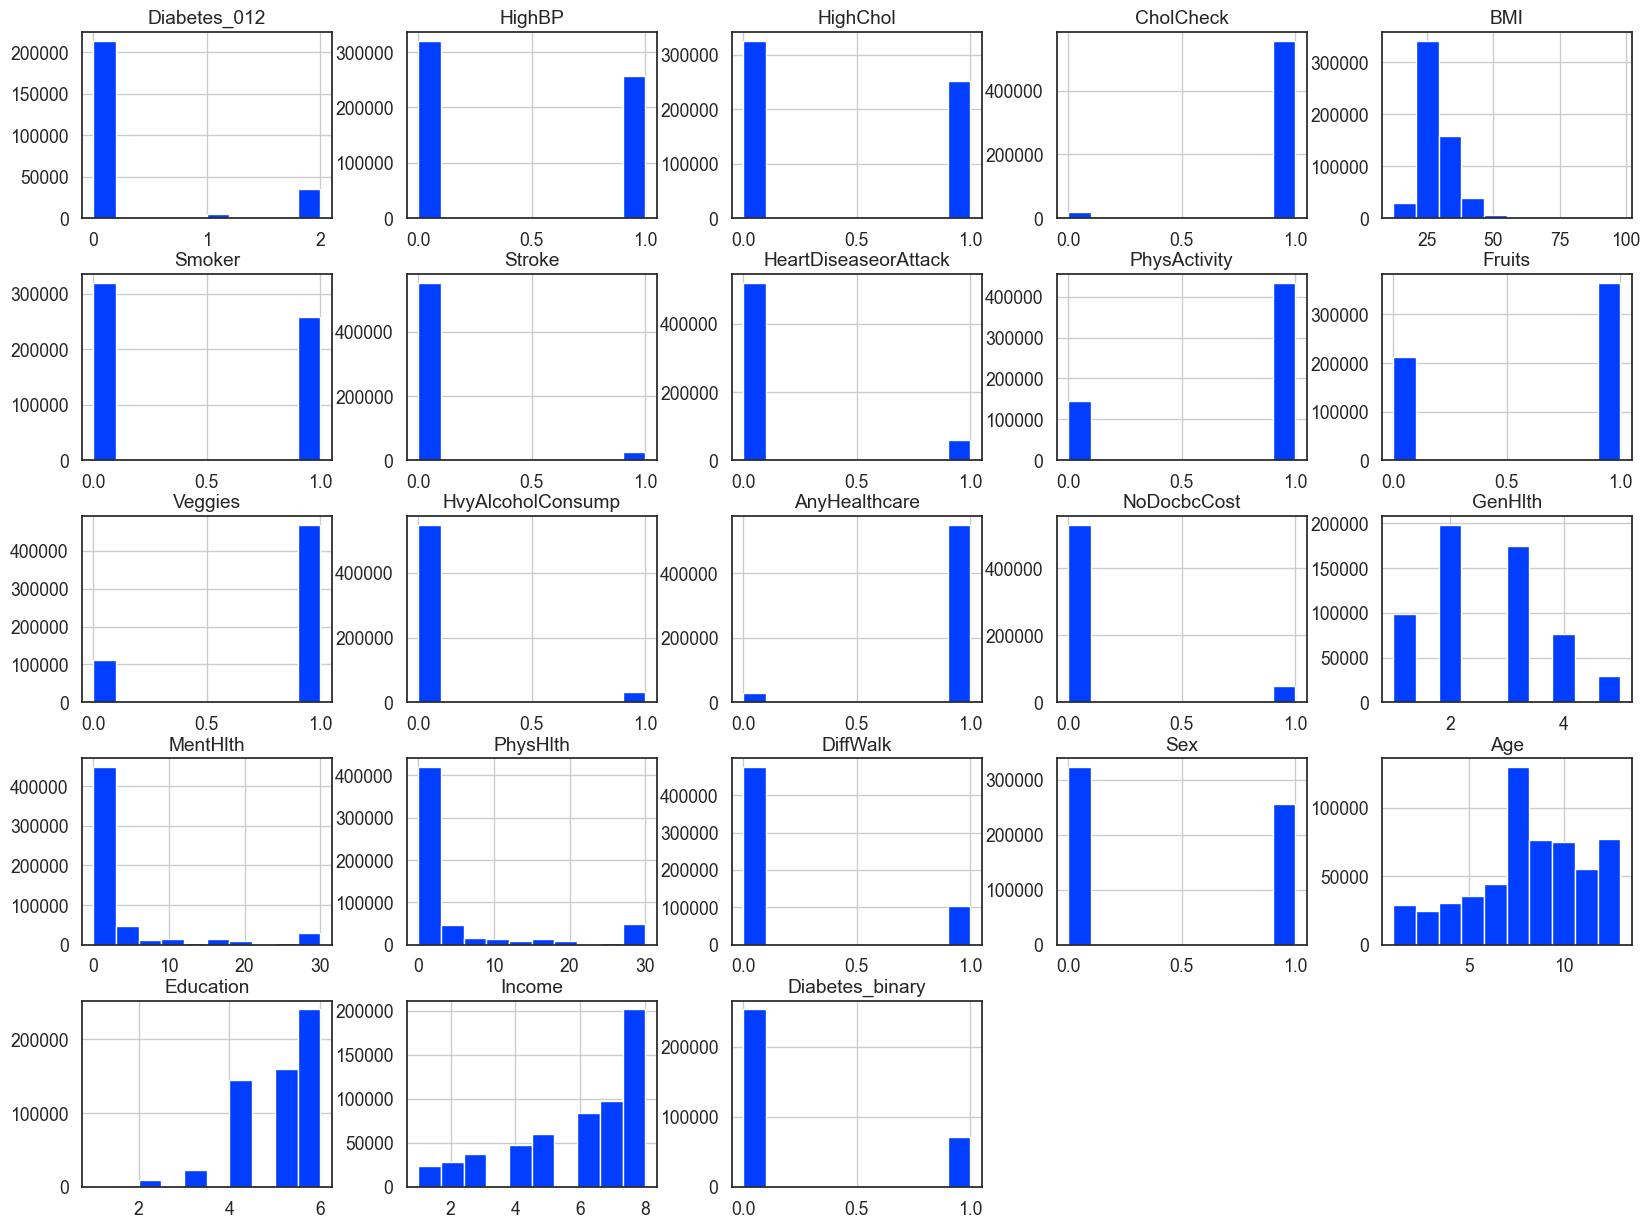

In [407]:
#using histogram to understand dataset better
diabetes_detailed.hist(figsize=(20,15));

Text(0.5, 1.0, 'correlation of feature')

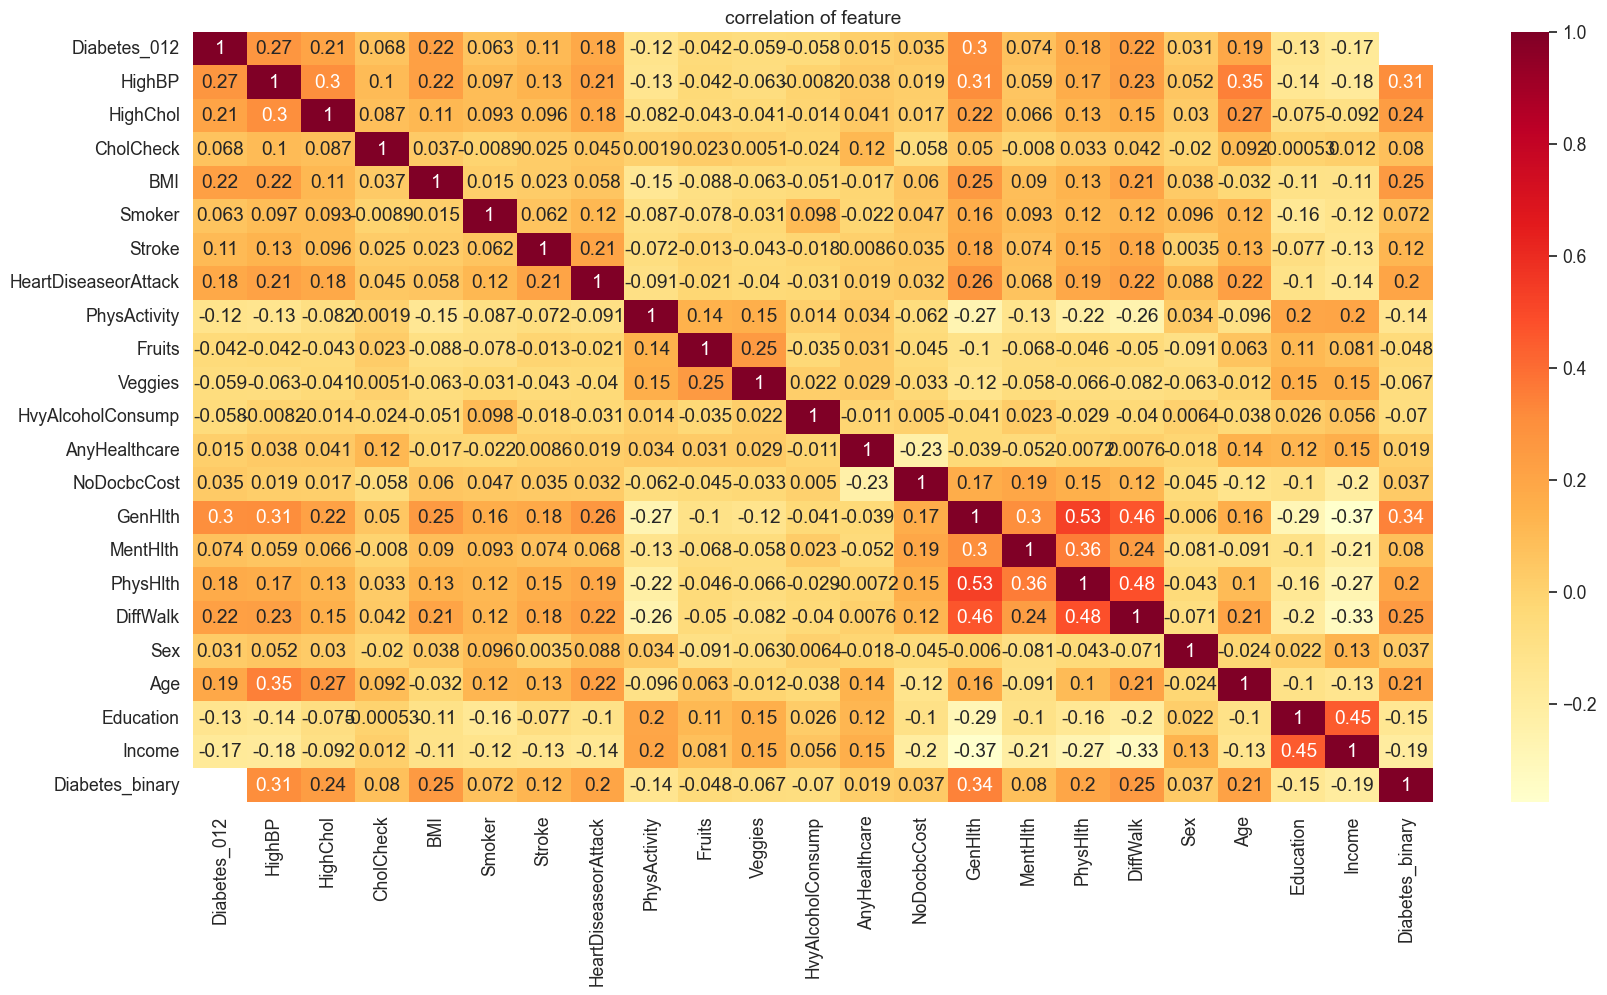

In [408]:
#using heatmap to understand correlation better in dataset df1 
#Heatmap of correlation
plt.figure(figsize = (20,10))
sns.heatmap(diabetes_detailed.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

Correlation heatmap show relation between columns
GenHlth and PhysHlth are highly correleted with each other.(positive relation)
GenHlth and Income are highly correleted with each other .(negetive relation)

In [409]:
#average of column Daibetes_binary 
# 0 for non-Diabetic person and 1 for Diabetic person
diabetes_detailed["Diabetes_binary"].value_counts()


0.0    253680
1.0     70692
Name: Diabetes_binary, dtype: int64

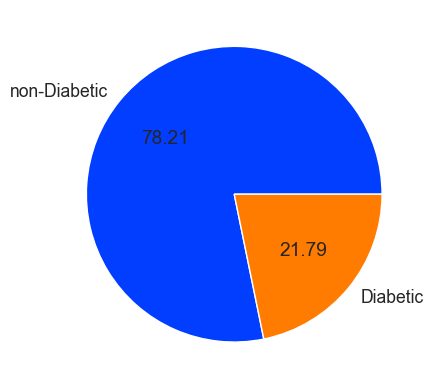

In [410]:
#checking diabetic and non diabetic pepoles average by pie
labels=["non-Diabetic","Diabetic"]
plt.pie(diabetes_detailed["Diabetes_binary"].value_counts() , labels =labels ,autopct='%.02f' );

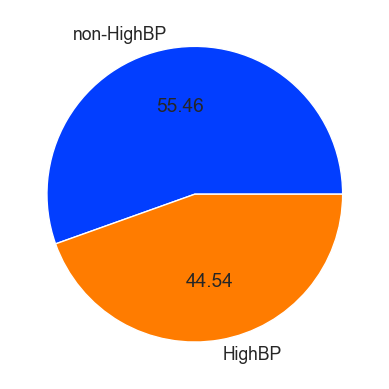

In [411]:
#checking HighBP and non HighBP pepoles average by pie 

labels=["non-HighBP","HighBP"]
plt.pie(diabetes_detailed["HighBP"].value_counts() , labels =labels ,autopct='%.02f' );

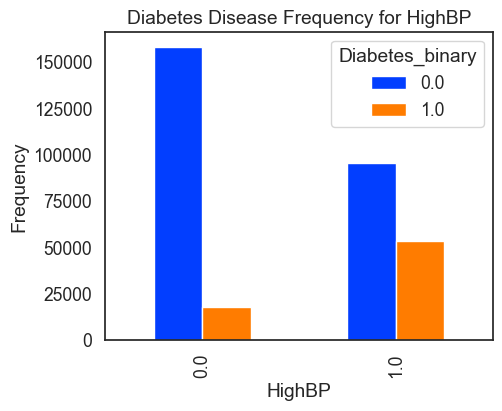

In [412]:
#Checking The relation B/W HighBP and Diabetes

pd.crosstab(diabetes_detailed.HighBP, diabetes_detailed.Diabetes_binary).plot(kind="bar",figsize=(5,4))
plt.title('Diabetes Disease Frequency for HighBP')
plt.xlabel("HighBP")
plt.ylabel('Frequency')
plt.show()

HighBP is a play a major role in Diabetes. When cases of high BP increases then cases of Diabetes also increases.

In [413]:
result_csv = result_csv.drop(["Glucose"], axis=1)

In [414]:
result_csv['BloodPressure'] = result_csv['BloodPressure'].apply(lambda x: 1 if x > 89 else 0)

In [415]:
temp_df = pd.concat([diabetes_detailed.pop(x) for x in ['HighBP', 'BMI', 'Age', 'Diabetes_binary']], axis=1)

In [416]:
temp_df.rename(columns = {'HighBP':'BloodPressure', 'Diabetes_binary': 'Outcome'}, inplace = True)

In [417]:
result_csv = pd.concat([result_csv, temp_df], ignore_index= True)

In [418]:
# The resulting dataframe
result_csv

,BloodPressure,BMI,Age,Outcome
0,0.0,33.6,50.0,1.0
1,0.0,26.6,31.0,0.0
2,0.0,23.3,32.0,1.0
3,0.0,28.1,21.0,0.0
4,0.0,43.1,33.0,1.0
...,...,...,...,...
581234,1.0,45.0,5.0,0.0
581235,1.0,18.0,11.0,1.0
581236,0.0,28.0,2.0,0.0
581237,1.0,23.0,7.0,0.0
